# ASTR 5490 Homework 3

In [36]:
# Import relevant modules/packages
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from astropy.timeseries import LombScargle
from PeriodicityTools import Periodicity
from GrazingTransit import GrazingTransit
from LimbDarkening import LimbDarkening
from Spectra import SpectralFeatures, Accuracy
from MathTools import Gaussian, NonRelDoppler
from TransitPlotter import LightCurveCompare
from Batman import BatmanModel

# Reload PeriodicityTools to acknowledge changes made in the script
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1) Exploring Radial Velocity Curve of 61 Vir b from Vogt et al. (2009)
### https://iopscience.iop.org/article/10.1088/0004-637X/708/2/1366#apj330338s2

No handles with labels found to put in legend.


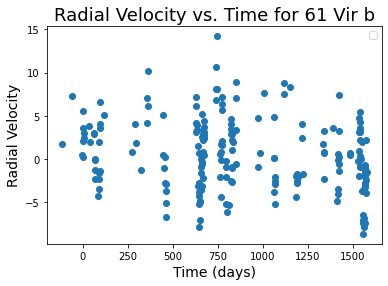

In [9]:
# Create instance of class
Virb = Periodicity('Vogt2009_61Virb_vels.dat','61 Vir b',None)

# Generate light curve for data
times,RVs,errors = Virb.LightCurve(curve='Radial Velocity')

## 1a) Make a periodogram of the whole dataset

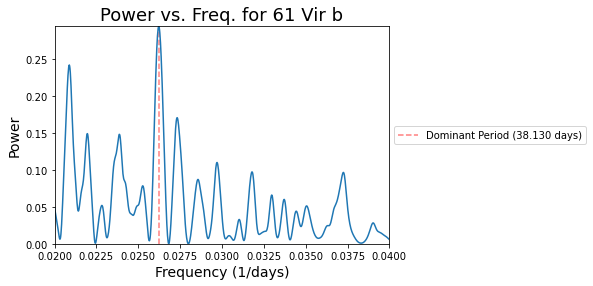

In [45]:
# Make a Lomb Scargle Periodogram of the data
original_maxPower = Virb.LS(25,50,1000,1,flux=[],plot=True)

### Looks quite similar to upper panel of Vogt et al. Figure 3, but my x-axis is the inverse of their's so mine's not exactly the same. I find the same as they do (38.13 d)

## 1b) Compute the false alarm probability considering the 38 day planet
### The F.A.P. is defined as "the fraction of trials for which the periodogram power exceeds the observed value" (Page 3 of Cumming 2004 - https://academic.oup.com/mnras/article/354/4/1165/1052087)

In [15]:
fap = Virb.FAP(10000)

FAP = 0.000e+00


## 1c) Fold the RV data at the period determined from the periodogram

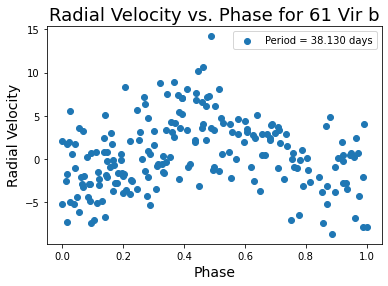

In [47]:
Virb_folded = Periodicity('Vogt2009_61Virb_vels.dat','61 Vir b',None,period=38.13)
new_times,new_RVs,new_errors = Virb_folded.LightCurve(xaxis='Phase',curve='Radial Velocity')

## 1d) Pick a ______ interval and find the FAP
### i ) contiguous 100d

In [13]:
# Find FAP over first 100 days of data
Virb_contig = Periodicity('Vogt2009_61Virb_vels.dat','61 Vir b',100,period=38.13)
contiguous_fap = Virb_contig.FAP(10000)

FAP = 0.000e+00


### ii) sparsed 100d

In [14]:
# Find FAP using first 50 and last 50 days of data
Virb_sparsed = Periodicity('Vogt2009_61Virb_vels.dat','61 Vir b',50,contiguous=False,period=38.13)
sparsed_FAP = Virb_sparsed.FAP(10000)

FAP = 0.000e+00


### My calculated FAP for each method of splicing the data was 0 and I ran them all for 10000 Monte Carlo iterations so the FAP must be $\leq 10^{-4}$. This indicates a high probability ($\geq 99.99\%$) of this being a true planet detection

# 2) Investigating Gaussian absorption lines

## 2a) Generate Gaussian absorption line for normalized spectrum with: $A=0.5$, $\sigma=1$ angs. centered at $5000$ angs. with pixels every 0.5 angs.

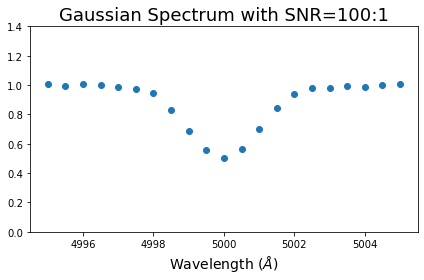

In [3]:
# Gaussian spectrium with SNR=100:1         
SNR_100 = SpectralFeatures(5000.0,1.0,0.5,0.0,1.0,0.5,100)
x,y_100 = SNR_100.GaussianNoise()

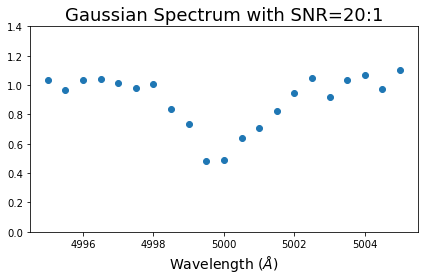

In [4]:
# Gaussian spectrium with SNR=20:1
SNR_20 = SpectralFeatures(5000.0,1.0,0.5,0.0,1.0,0.5,20)
x,y_20 = SNR_20.GaussianNoise()

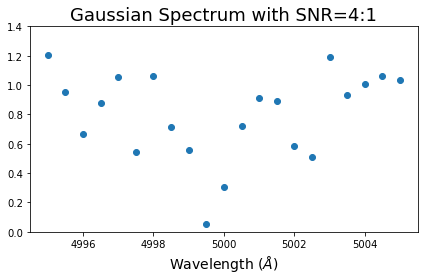

In [5]:
# Gaussian spectrium with SNR=4:1
SNR_4 = SpectralFeatures(5000.0,1.0,0.5,0.0,1.0,0.5,4)
x,y_4 = SNR_4.GaussianNoise()

## 2a) Use curve_fit to fit Gaussian to noisy data from 2a. Plot accuracy of the center of the profile (mean) vs. SNR

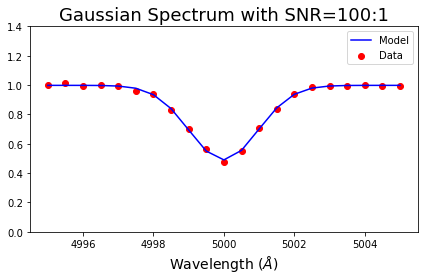

In [6]:
# Plot data vs. model for SNR = 100:1
accuracy_100 = SNR_100.GaussianModel(plot=True)

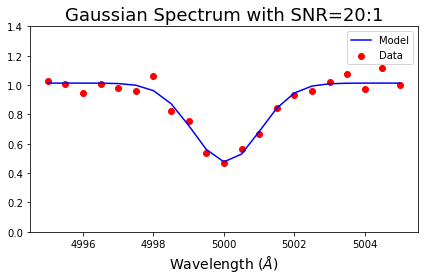

In [8]:
# Plot data vs. model for SNR = 20:1
accuracy_20 = SNR_20.GaussianModel(plot=True)

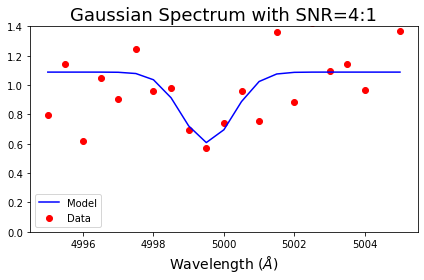

In [10]:
# Plot data vs. model for SNR = 4:1
accuracy_4 = SNR_4.GaussianModel(plot=True)

10 out of 490 trials had accuracy > 1


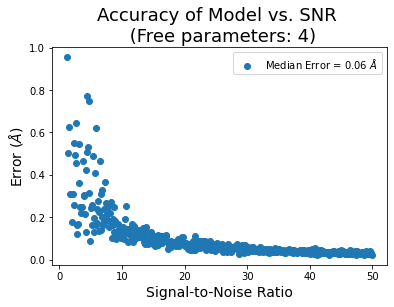

In [48]:
# Make list of SNRs and empty list of accuracies
SNRs = np.arange(1,50,.1)
Accuracy(4,SNRs)

## 2c) Repeat 2b for the mean being the only free parameter

8 out of 490 trials had accuracy > 1


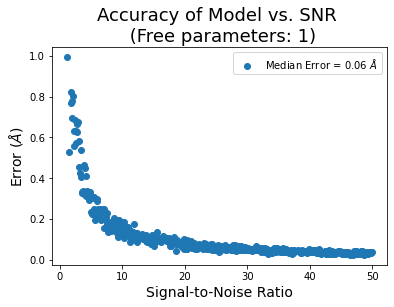

In [49]:
Accuracy(1,SNRs)

## 2d) Convert accuracy in angs to km/s for 2b and 2c (using non-relativistic Doppler Eqn.)
### $\lambda^{\prime}=\lambda_{0}\left(1+\frac{v}{c_{0}}\right)$ --> $v=c_0\left(\frac{\lambda^{\prime}}{\lambda_{0}}-1\right)$

11 out of 490 trials had accuracy > 1


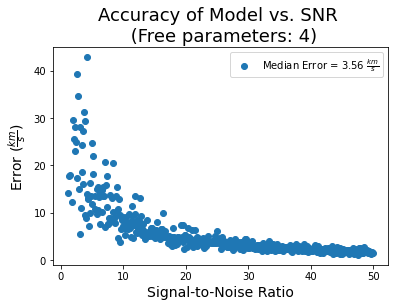

In [51]:
Accuracy(4,SNRs,'km/s')

7 out of 490 trials had accuracy > 1


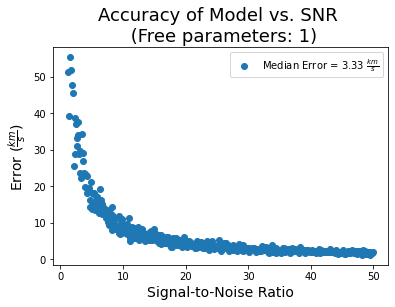

In [52]:
Accuracy(1,SNRs,'km/s')

### Models agree much better for data sets with higher SNR. Once SNR > 30, model doesn't fit significantly better if SNR keeps getting better (increasing). Models also agree better when you fit less free parameters (less deviation this way)

## 2e) What mass planet could you detect if you have $N=10^1,10^2,10^3$ absorption lines? Remember that accuracy improves as $\sqrt{N}$ (so $\frac{accuracy}{\sqrt{N}}$)

### For $N=10$: $\sqrt{10}\approx 3.16$ --> $acc. \approx 1.10 \frac{km}{s}=1110 \frac{m}{s}$ --> detect $M_{p}> 10^{28.5} kg\approx 16.6 M_{Jup}$
### For $N=10^2$: $\sqrt{10^2}= 10$ --> $acc. \approx 0.34 \frac{km}{s}=340 \frac{m}{s}$ --> detect $M_{p}>10^{28} kg\approx 5.26 M_{Jup}$
### For $N=10^3$: $\sqrt{10^3}\approx 31.6$ --> $acc. \approx 0.10 \frac{km}{s}=100\frac{m}{s}$ --> detect $M_{p}>10^{27.5} kg\approx 1.66 M_{Jup}$

# 3) Plot of orbital inclination vs. semi-major axis with lines corresponding to grazing transit for planets from Earth to Jupiter-size. Also shading approx. habitable zone.
## <u>Grazing transit</u>
### i) Impact parameter (b): $b=acos(i)$
### ii) Grazing condition: $b=acos(i)\leq R_{p}+{R_{*}}$

## 3a) M0V (dwarf) Host Star: $T_{eff}=3870K; R_{*}=.559R_{\odot}$

## 3b) K0III (giant) Host Star: $T_{eff}=4810K, R_{*}= 10R_{\odot}$ (couldn't find exact radius)
### Property source: http://www.pas.rochester.edu/~emamajek/EEM_dwarf_UBVIJHK_colors_Teff.txt

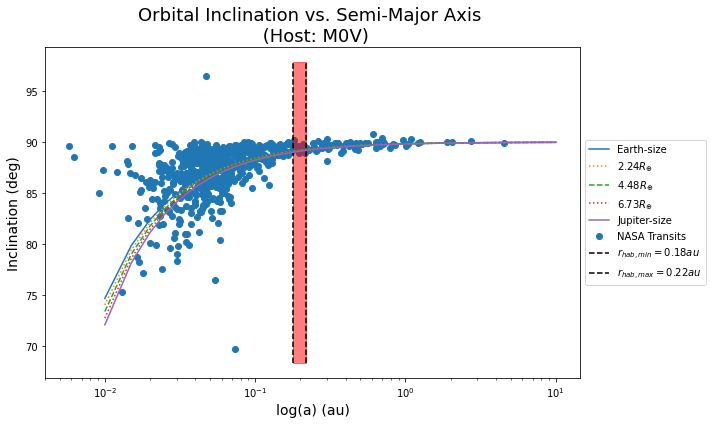

In [4]:
# Plot grazing transits and habitable zone for M0V star
M0V = GrazingTransit('M')
M0V.InclinationSemiMajor()

### It is well within observational limits to observe an Earth to Jupiter size planet in the habitable zone of an M0V star with the transit method. Many transit detections published in the NASA Exoplanet Archive fall in this detection range.

/d/users/jimmy/Documents/ASTR5490/HW3/GrazingTransit.py:56: RuntimeWarning: invalid value encountered in arccos
  def InclinationSemiMajor(self):


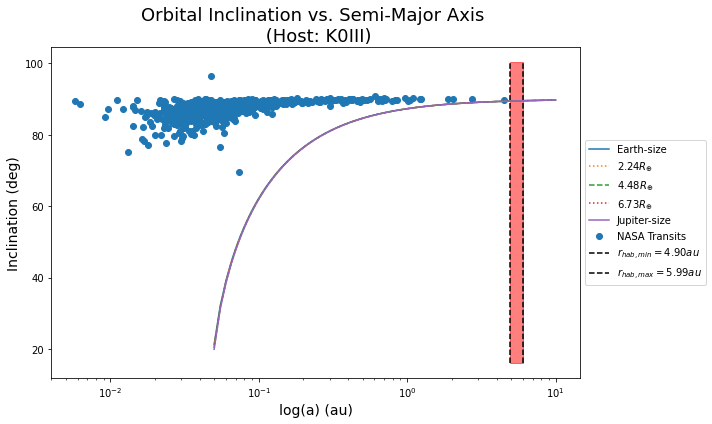

In [5]:
# Plot grazing transits and habitable zone for M0V star
K0III = GrazingTransit('K')
K0III.InclinationSemiMajor()

### It seems just beyond observational limits to observe an Earth to Jupiter size planet in the habitable zone of a K0III star with the transit method. There are a few transit detections published in the NASA Exoplanet Archive that lie near this detection range, but none lie within it. In both plots we see a bias in transit detections of high-inclination exoplanets likely because the exoplanet occults more of the star's light when the system is ege-on w.r.t Earth. We don't see a transit if the system is at a low inclination (i.e. face on) so it's not surprising that most transit detections have high inclinations.

# 4) Simulate a star as a solid face-on disk by breaking the stellar surface into a grid of 1000x1000 square pixels

## 4a) Assign each pixel a surface brightness with 1.0 at the center. Use quadratic limb darkening tables-Van Hamme (1993)-to assign a relative brightness to other pixels. Assume G2V star with $T_{eff}=5500K$ and $\lambda_{obs}=5000$ angs
### Van Hamme (1993): https://ui.adsabs.harvard.edu/abs/1993AJ....106.2096V/abstract
### Source for log(g) of dwarf (V) stars: http://www.astro.sunysb.edu/metchev/PHY521/lecture2.pdf

## Q.L.D.: $I(\mu)=I(0)\left[1-a(1-\mu)-b(1-\mu)^2\right]$
## Substituting for $\mu$: $I(\mu)=I(0)\left[1-a\left(1-\sqrt{\frac{R_{*}^2-r^2}{R_{*}^2}}\right)-b\left(1-\sqrt{\frac{R_{*}^2-r^2}{R_{*}^2}}\right)^2\right]$ where $a$ is the radius of the disc and $r$ is the distance from the center of the disc (guidance from http://orca.phys.uvic.ca/~tatum/stellatm/atm6.pdf)
## I'm sourcing $a$ and $b$ from Table 5 on the 10th page of Wade & Rucinski (1985): http://articles.adsabs.harvard.edu/pdf/1985A%26AS...60..471W

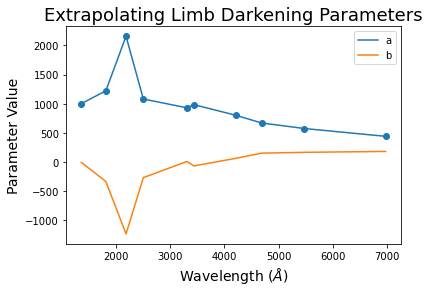

In [57]:
# We're using 5000 angstroms so this is my attempt to extrapolate proper a and b values
lambdas = [1362,1815,2187,2506,3312,3437,4212,4687,5475,6975]
a_list = [1002,1222,2157,1082,930,985,803,671,576,442]
b_list = [-3,-332,-1230,-266,11,-65,65,154,168,183]
plt.plot(lambdas,a_list,label='a')
plt.plot(lambdas,b_list,label='b')
plt.scatter(lambdas,a_list)
plt.xlabel(r'Wavelength ($\AA$)',fontsize=14)
plt.ylabel('Parameter Value',fontsize=14)
plt.title('Extrapolating Limb Darkening Parameters',fontsize=18)
plt.legend()

### In range of 5000 angs., the relationship for both parameters seems pretty linear so I'll use a linear extrapolation to find a and b at 5000 angs

In [58]:
# List indexes of lambdas that lie above and below 5000 angs.
min_index = 7
max_index = 8

# Define sublists of points below and above point of interest
a_sub = [a_list[min_index],a_list[max_index]]
b_sub = [b_list[min_index],b_list[max_index]]
lambdas_sub = [lambdas[min_index],lambdas[max_index]]

# Interpolate to find proper values at 5000 angs
a_new = np.interp(5000,lambdas_sub,a_sub)
b_new = np.interp(5000,lambdas_sub,b_sub)
print(a_new,b_new)

633.2652284263959 159.56091370558374


/d/users/jimmy/Documents/ASTR5490/HW3/LimbDarkening.py:36: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1-abs(r**2/R_star**2))


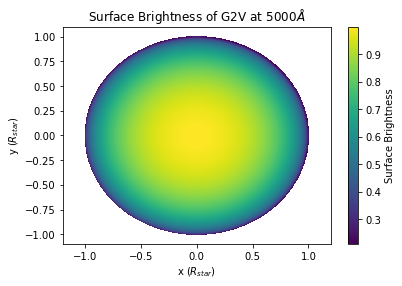

In [59]:
# Use LimbDarkening function to plot surface of G2V star
star = LimbDarkening(633.27/1000,159.56/1000)
x,y,intensities = star.Star(1000)

## 4b) Plot light curve of transit of .05$R_{star}$ at impact parameter 0

In [10]:
star_b = LimbDarkening(5500,500)

My program took 240.88 seconds to run


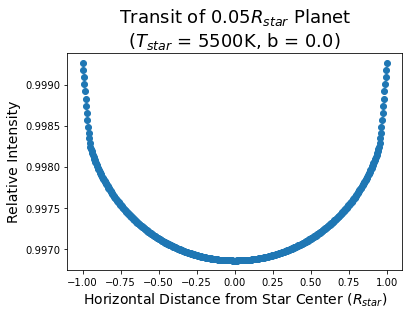

In [27]:
star_b.Transit(0.05,0.0,False)

## 4c) Plot light curve of transit of .05$R_{star}$ at impact parameter 0.5

My program took 3.75 minutes to run


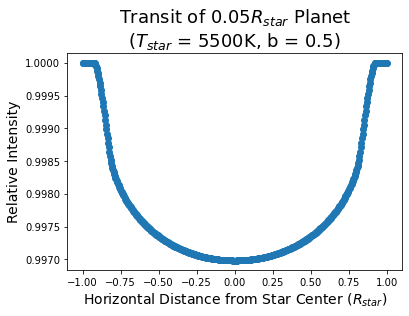

In [11]:
star_b.Transit(0.05,0.5,False)

## 4d) Plot light curve of transit of .05$R_{star}$ at impact parameter 0.9 (grazing transit)

My program took 3.84 minutes to run


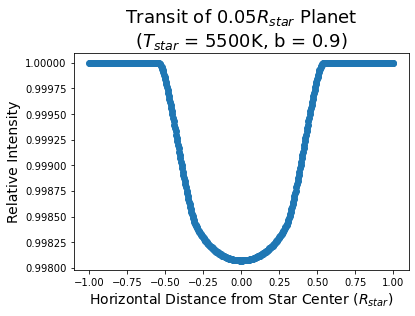

In [12]:
star_b.Transit(0.05,0.9,False)

## 4e) Overplot on the plots for B/C/D the light curve for a T=10,000 K host star and a 3600 K host star and summarize the differences
### For 10000K, got parameters from: First two rows at relevant temp. in Table 3 of Claret (2013) http://cdsarc.u-strasbg.fr/ftp/cats/J/A+A/552/A16/ori/Table3

In [13]:
star_10000K = LimbDarkening(10000,500)

My program took 4.87 minutes to run


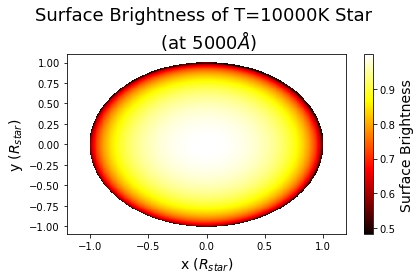

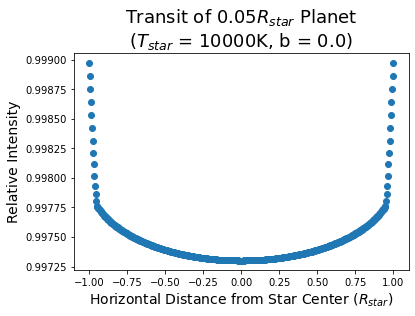

In [30]:
# impact parameter = 0
star_10000K.Star(plot=True)
star_10000K.Transit(0.05,0.0,False)

My program took 4.15 minutes to run


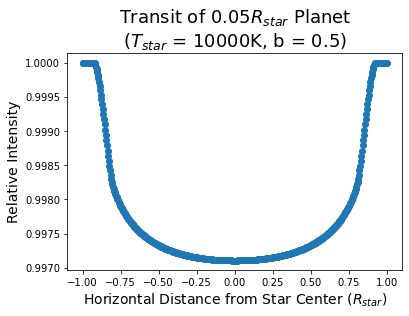

In [31]:
# impact parameter = 0.5
star_10000K.Transit(0.05,0.5,False)

My program took 4.15 minutes to run


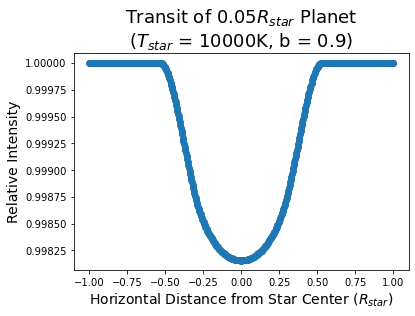

In [32]:
# impact parameter = 0.9
star_10000K.Transit(0.05,0.9,False)

### For 3600K, got parameters from: Column 10 (V filter) of Table 2 from Claret (1998) https://cdsarc.unistra.fr/viz-bin/ReadMe/J/A+A/335/647?format=html&tex=true

In [14]:
star_3600K = LimbDarkening(3600,500)

My program took 4.13 minutes to run


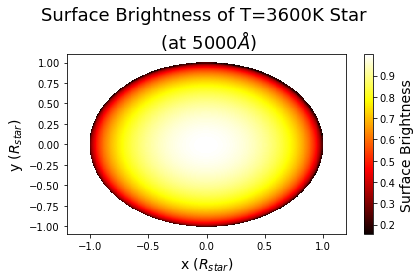

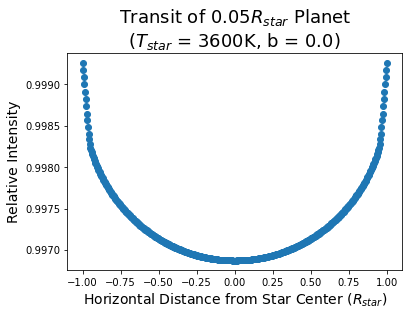

In [35]:
# impact parameter = 0
star_3600K.Star(plot=True)
star_3600K.Transit(0.05,0.0,False)

My program took 4.20 minutes to run


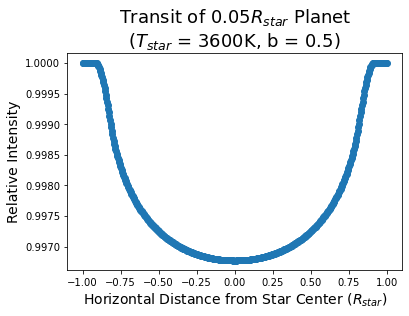

In [36]:
# impact parameter = 0.5
star_3600K.Transit(0.05,0.5,False)

My program took 3.74 minutes to run


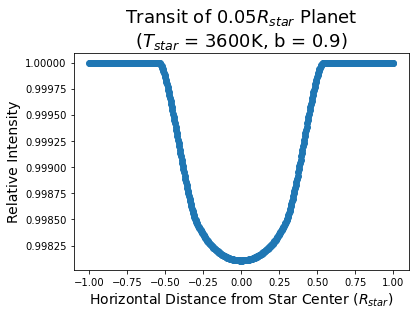

In [15]:
# impact parameter = 0.9
star_3600K.Transit(0.05,0.9,False)

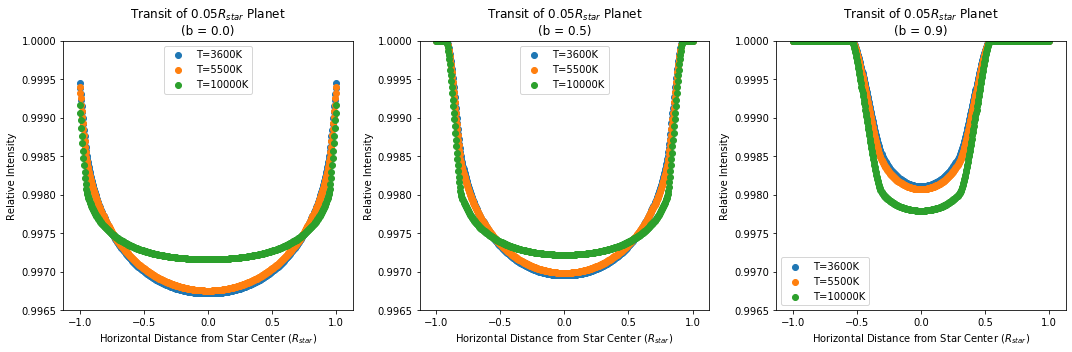

In [30]:
LightCurveCompare()

## 4f) Comparing result from 4c (b=0.5) to results from Kreidberg 2015 who used 'batman'
### Figure 2 of Kreidberg 2015 https://iopscience.iop.org/article/10.1086/683602/pdf

### My plots are very similar qualititavely with the same wide U-shaped curve with flat edges at the beginning and end of the transit. Quantitatively, my model dooes not dip as low as Kreidberg (0.997 for mine, 0.990 for theirs). Overall, I'd say my model replicates theirs quite well. For b=0, my code stars when the planet is just on the edge which is why there's no horizontal lines at the top of the transit 'well' in this case.

# 5) Now let your star rotate with an equatorial velocity of $v_R=10 \frac{km}{s}$. The projected radial velocity of each surface element is a function of stellar latitude $\phi$ and longitude $\theta$
## <center> $v_{rad}=v_Rsin\theta cos\phi$ </center>

## 5a) Using your pixelated numerical star surface code, produce an intensity-weighted velocity profile plot for the star with no transit. This is also known as the rotational velocity profile (in the following, I use conventions define in Table 1 here https://en.wikipedia.org/wiki/Del_in_cylindrical_and_spherical_coordinates)

## <center> $\theta=arctan\left(\frac{\sqrt{x^2+y^2}}{z}\right)$, $\phi=arctan\left(\frac{y}{x}\right)$ </center>

## <center> $v_{rad} = v_R sin\left(arctan\left(\frac{\sqrt{x^2+y^2}}{\sqrt{R_{star}^2-x^2-y^2}}\right)\right)cos\left(arctan\left(\frac{y}{x}\right)\right)$ </center>

/d/users/jimmy/Documents/ASTR5490/HW3/LimbDarkening.py:53: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1-abs(r**2/R_star**2))
/d/users/jimmy/Documents/ASTR5490/HW3/LimbDarkening.py:213: RuntimeWarning: invalid value encountered in sqrt
  theta = np.sqrt((x**2+y**2)/(1.0-x**2-y**2))


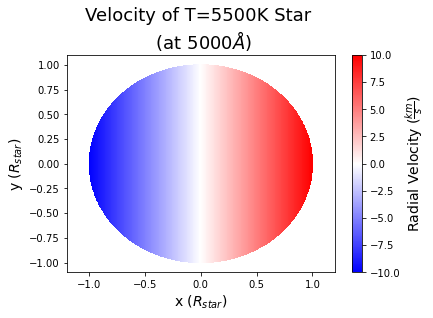

In [5]:
# Tests of class and functions within the class
RotatingStar = LimbDarkening(5500,1000)
RotatingStar.RVProfile(plot='star')

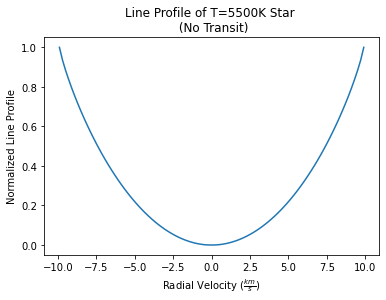

In [6]:
RotatingStar.RVProfile(plot='profile')

## 5b) Produce the same proifle for the star for when the planet is at four different positions across the disk of the star at an impact parameter of b=0.5
## 5c) Plot the difference between the 5a and 5b plots. Compare quantitatively to those in Figure 1 of Gaudia & Winn (2007, ApJ).
## https://ui.adsabs.harvard.edu/abs/2007ApJ...655..550G/abstract

/d/users/jimmy/Documents/ASTR5490/HW3/LimbDarkening.py:53: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1-abs(r**2/R_star**2))
/d/users/jimmy/Documents/ASTR5490/HW3/LimbDarkening.py:213: RuntimeWarning: invalid value encountered in sqrt
  theta = np.sqrt((x**2+y**2)/(1.0-x**2-y**2))


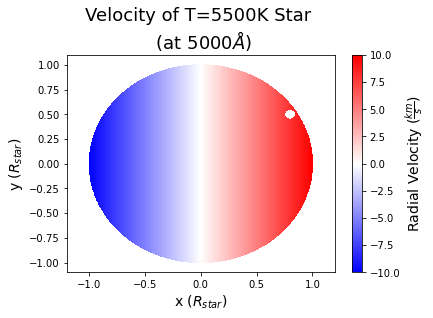

In [10]:
RotatingStar.RVProfileTransit(x_center=0.8,plot='star')

/d/users/jimmy/Documents/ASTR5490/HW3/LimbDarkening.py:53: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1-abs(r**2/R_star**2))
/d/users/jimmy/Documents/ASTR5490/HW3/LimbDarkening.py:213: RuntimeWarning: invalid value encountered in sqrt
  theta = np.sqrt((x**2+y**2)/(1.0-x**2-y**2))


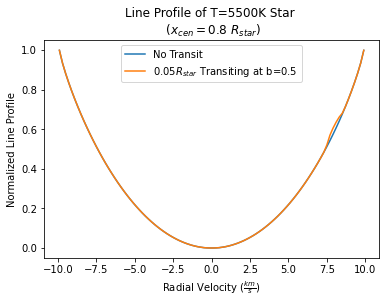

In [14]:
RotatingStar.RVProfileTransit(x_center=0.8,plot='profile')

/d/users/jimmy/Documents/ASTR5490/HW3/LimbDarkening.py:53: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1-abs(r**2/R_star**2))
/d/users/jimmy/Documents/ASTR5490/HW3/LimbDarkening.py:213: RuntimeWarning: invalid value encountered in sqrt
  theta = np.sqrt((x**2+y**2)/(1.0-x**2-y**2))


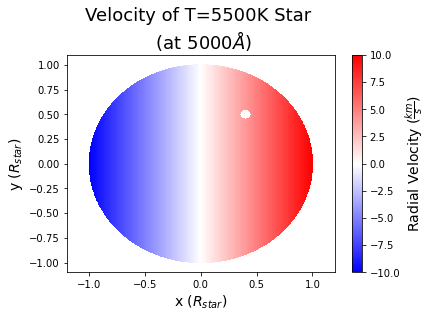

In [15]:
RotatingStar.RVProfileTransit(x_center=0.4,plot='star')

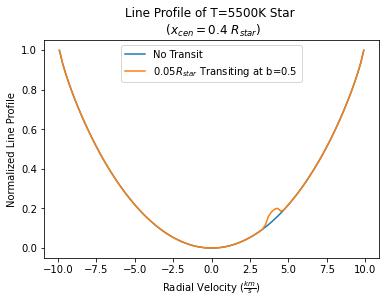

In [16]:
RotatingStar.RVProfileTransit(x_center=0.4,plot='profile')

/d/users/jimmy/Documents/ASTR5490/HW3/LimbDarkening.py:53: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1-abs(r**2/R_star**2))
/d/users/jimmy/Documents/ASTR5490/HW3/LimbDarkening.py:213: RuntimeWarning: invalid value encountered in sqrt
  theta = np.sqrt((x**2+y**2)/(1.0-x**2-y**2))


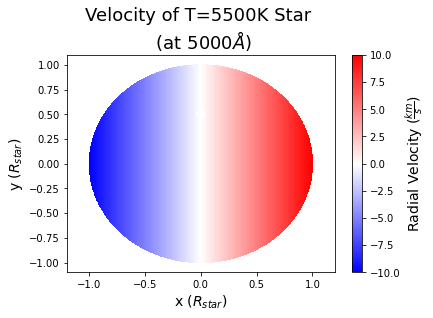

In [17]:
RotatingStar.RVProfileTransit(x_center=0.0,plot='star')

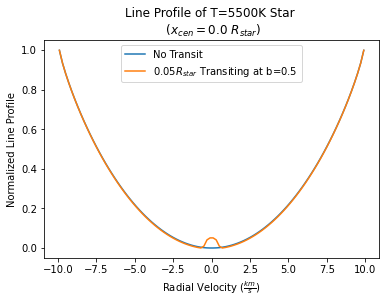

In [18]:
RotatingStar.RVProfileTransit(x_center=0.0,plot='profile')

/d/users/jimmy/Documents/ASTR5490/HW3/LimbDarkening.py:53: RuntimeWarning: invalid value encountered in sqrt
  mu = np.sqrt(1-abs(r**2/R_star**2))
/d/users/jimmy/Documents/ASTR5490/HW3/LimbDarkening.py:213: RuntimeWarning: invalid value encountered in sqrt
  theta = np.sqrt((x**2+y**2)/(1.0-x**2-y**2))


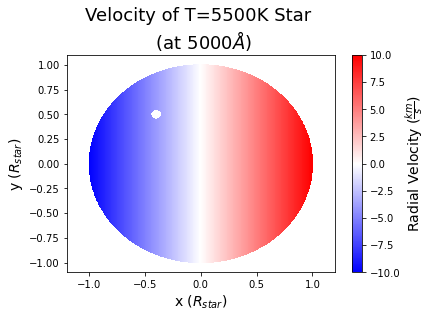

In [19]:
RotatingStar.RVProfileTransit(x_center=-.4,plot='star')

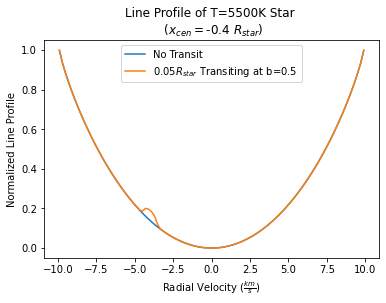

In [20]:
RotatingStar.RVProfileTransit(x_center=-.4,plot='profile')

## My plots are qualitatively very similar to those in Gaudi & Winn (2007, ApJ). My plots only include when the planet is just out-of-transit and fully in-transit so I don't have the zero-slope edges at the top-right and top-left of my plots like they do.

# 6) Fold Kepler 33 data at period of Planet C. Use 'batman' light curve tool (https://www.cfa.harvard.edu/~lkreidberg/batman/tutorial.html) to fit a light transit curve to the data and recover planet parameters from Lissauer et al. (2012; https://ui.adsabs.harvard.edu/abs/2012ApJ...750..112L/abstract)

## Raw Light Curve (chose subset of phase interval to zoom in on dip)

In [4]:
# Initialize my Periodicity class and plot the light curve
Kepler33c = Periodicity('Kepler33.dat','Kepler 33c',['col0','col1','col2'],5000,contiguous='Bookend',period=13.17562)

No handles with labels found to put in legend.


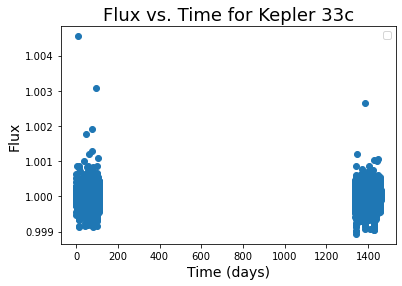

In [5]:
time,rel_flux,err = Kepler33c.LightCurve(plot=True,xaxis='Time')

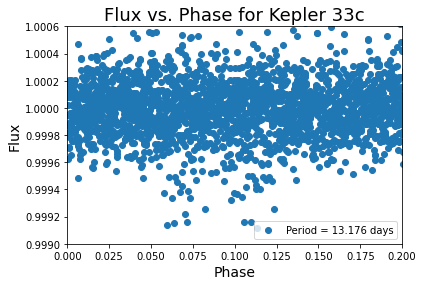

In [6]:
phase,rel_flux,err = Kepler33c.LightCurve(plot=True,xaxis='Phase')

In [37]:
# Using actual parameters from paper
batman_time_actual,batman_flux_actual,rad_pl_actual = BatmanModel(P=13.17562,rad_pl=0.01602,a=13.8,i=88.19,e=0.2,w=0.0,coeff=[0.4899, 0.1809],plot=False)

In [38]:
# Cut real data to zoom in on transit
phase_cut = [(i,x) for (i,x) in enumerate(phase) if x <= 0.2]
cuts = [x[0] for x in phase_cut]
phase_cuts = [x[1] for x in phase_cut]
rel_flux_cuts = []
for index in cuts:
    flux = rel_flux[index]
    rel_flux_cuts.append(flux)

def BatmanCompare(xdata,ydata,rad_pl):
    # Plot real phased data and Batman model
    fig,ax = plt.subplots()
    ax.scatter(phase_cuts,rel_flux_cuts,label='Phased Data')
    ax.scatter(xdata,ydata,label=r'Batman Model ($r_{pl}$=%.2e $R_{*}$)'%rad_pl)
    ax.get_yaxis().get_major_formatter().set_useOffset(False)
    ax.set_ylim(0.999,1.0005)
    ax.set_xlabel('Phase',fontsize=18)
    ax.set_ylabel('Relative Flux',fontsize=18)
    ax.set_title('Modeling Kepler 33c Transit',fontsize=18)
    ax.legend()

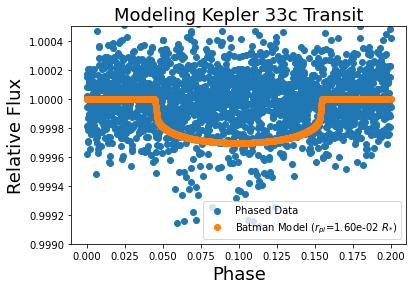

In [39]:
BatmanCompare(batman_time_actual,batman_flux_actual,rad_pl_actual)

### Actual radius from paper doesn't look like it quite fits. I'll try looping over radii to test better versions

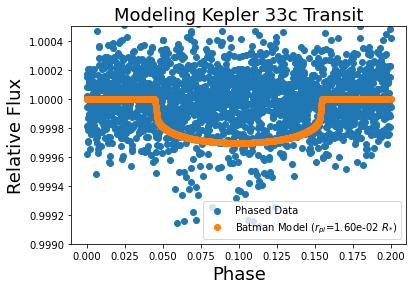

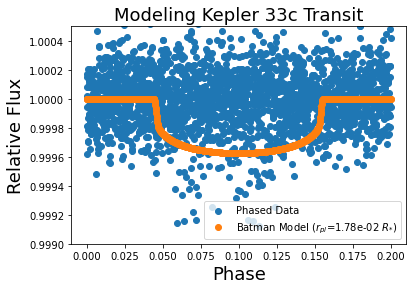

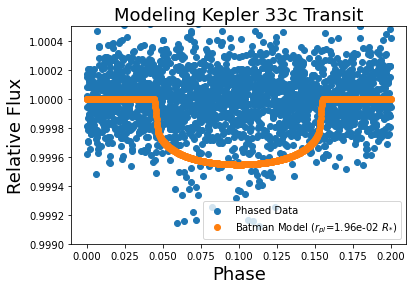

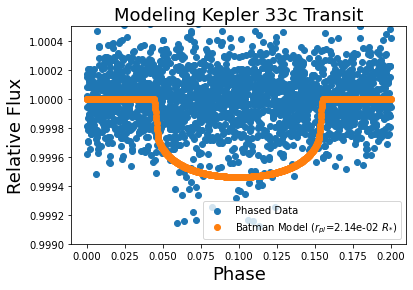

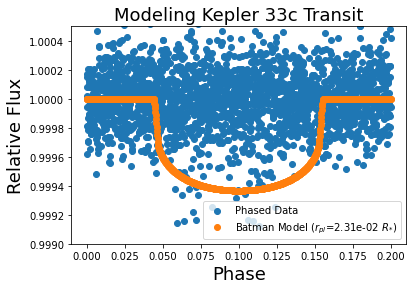

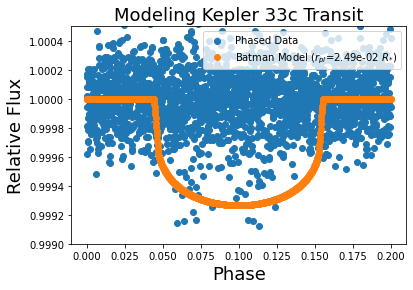

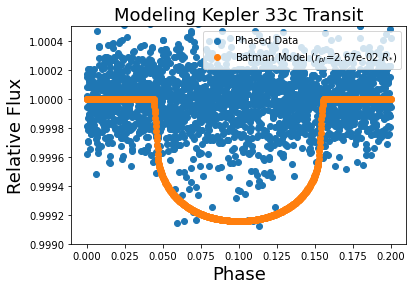

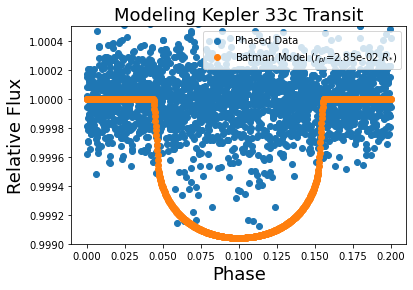

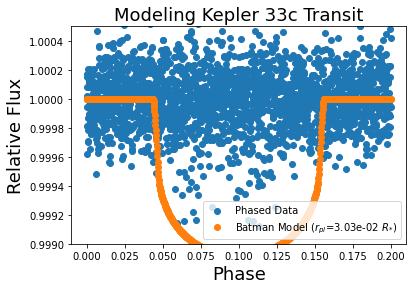

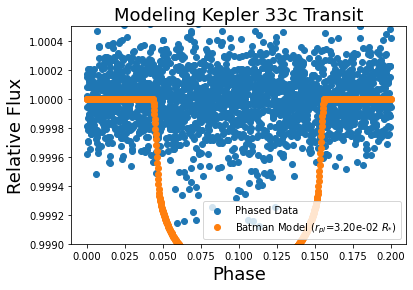

In [45]:
test_radii = np.linspace(rad_pl_actual,2*rad_pl_actual,10)
for radius in test_radii:
    times, fluxes,rad_pl = BatmanModel(P=13.17562,rad_pl=radius,a=13.8,i=88.19,e=0.2,w=0.0,coeff=[0.4899, 0.1809],plot=False)
    BatmanCompare(times,fluxes,rad_pl)

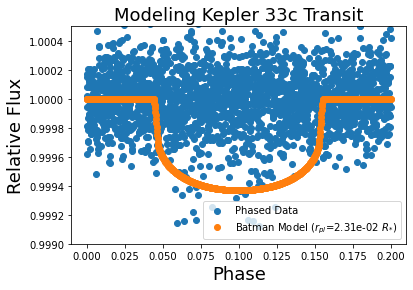

In [47]:
# Plot best radius
finalx,finaly,rad = BatmanModel(P=13.17562,rad_pl=.0231,a=13.8,i=88.19,e=0.2,w=0.0,coeff=[0.4899, 0.1809],plot=False)
BatmanCompare(finalx,finaly,rad)

### My best-fit used a radius of $0.0231R_{*}$ which is 1.44 times greater than the published value of $0.01602R_{*}$. Not bad at all!